In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [2]:
df = pd.read_csv('dataset/Food_Delivery_Times.csv')
df.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


In [3]:
cat_cols = ['Weather','Traffic_Level','Time_of_Day','Vehicle_Type']
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)
df.head()

,Order_ID,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min,Weather_Foggy,Weather_Rainy,Weather_Snowy,Weather_Windy,Traffic_Level_Low,Traffic_Level_Medium,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Vehicle_Type_Car,Vehicle_Type_Scooter
0,522,7.93,12,1.0,43,False,False,False,True,True,False,False,False,False,False,True
1,738,16.42,20,2.0,84,False,False,False,False,False,True,True,False,False,False,False
2,741,9.52,28,1.0,59,True,False,False,False,True,False,False,False,True,False,True
3,661,7.44,5,1.0,37,False,True,False,False,False,True,False,False,False,False,True
4,412,19.03,16,5.0,68,False,False,False,False,True,False,False,True,False,False,False


In [4]:
df.dropna()

,Order_ID,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min,Weather_Foggy,Weather_Rainy,Weather_Snowy,Weather_Windy,Traffic_Level_Low,Traffic_Level_Medium,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Vehicle_Type_Car,Vehicle_Type_Scooter
0,522,7.93,12,1.0,43,False,False,False,True,True,False,False,False,False,False,True
1,738,16.42,20,2.0,84,False,False,False,False,False,True,True,False,False,False,False
2,741,9.52,28,1.0,59,True,False,False,False,True,False,False,False,True,False,True
3,661,7.44,5,1.0,37,False,True,False,False,False,True,False,False,False,False,True
4,412,19.03,16,5.0,68,False,False,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,107,8.50,13,3.0,54,False,False,False,False,False,False,True,False,False,True,False
996,271,16.28,8,9.0,71,False,True,False,False,True,False,False,True,False,False,True
997,861,15.62,26,2.0,81,False,False,True,False,False,False,True,False,False,False,True
998,436,14.17,8,0.0,55,False,False,False,False,True,False,False,False,False,False,False


In [5]:
df = df.drop(columns=['Order_ID'])
df.head()

,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min,Weather_Foggy,Weather_Rainy,Weather_Snowy,Weather_Windy,Traffic_Level_Low,Traffic_Level_Medium,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Vehicle_Type_Car,Vehicle_Type_Scooter
0,7.93,12,1.0,43,False,False,False,True,True,False,False,False,False,False,True
1,16.42,20,2.0,84,False,False,False,False,False,True,True,False,False,False,False
2,9.52,28,1.0,59,True,False,False,False,True,False,False,False,True,False,True
3,7.44,5,1.0,37,False,True,False,False,False,True,False,False,False,False,True
4,19.03,16,5.0,68,False,False,False,False,True,False,False,True,False,False,False


In [6]:
avg = df['Courier_Experience_yrs'].mean()
df['Courier_Experience_yrs'].fillna(avg, inplace=True)

C:\Users\Maharshi\AppData\Local\Temp\ipykernel_13996\3767755336.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Courier_Experience_yrs'].fillna(avg, inplace=True)


In [7]:
X = df.drop(columns=['Delivery_Time_min'])
y = df['Delivery_Time_min']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [9]:
def knn(n):
    model = KNeighborsRegressor(n_neighbors=n)
    model.fit(X_train, y_train)

    print("Train R^2:", model.score(X_train, y_train))
    print("Test R^2:", model.score(X_test, y_test))
    y_pred = model.predict(X_test)
    mse=mean_squared_error(y_test,y_pred)
    mae=mean_absolute_error(y_test,y_pred)
    rmse = np.sqrt(mse)
    print(f'Mean square error: {mse}')
    print(f'Mean Absolute Error: {mae}')
    print(f'Root Mean Square Error: {rmse}')
    plt.figure(figsize=(8,6))
    plt.scatter(y_test, y_pred, label='Predicted')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], lw=2, label='Ideal Fit')
    plt.xlabel('Actual Time')
    plt.ylabel('Predicted Time')
    plt.title('Predicted vs Actual Delivery Times')
    plt.legend()
    plt.show()

Train R^2: 1.0
Test R^2: 0.3736831143514656
Mean square error: 270.5133333333333
Mean Absolute Error: 11.38
Root Mean Square Error: 16.44728954367051


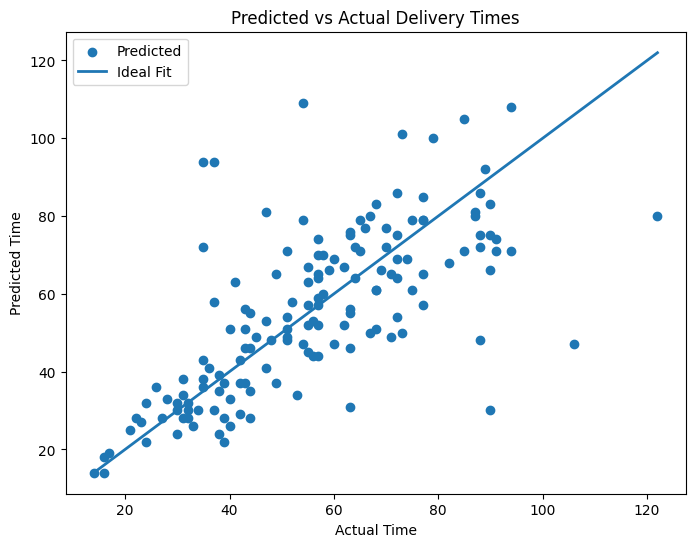

In [10]:
knn(1)

Train R^2: 0.8578164496854512
Test R^2: 0.5044236964710037
Mean square error: 214.045
Mean Absolute Error: 10.256666666666666
Root Mean Square Error: 14.630276825815702


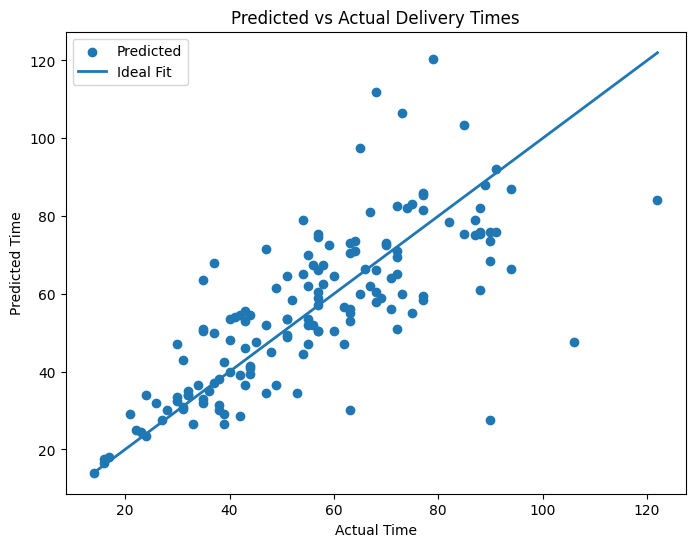

In [11]:
knn(2)

Train R^2: 0.8265649139988736
Test R^2: 0.5695944009352811
Mean square error: 185.89703703703705
Mean Absolute Error: 9.886666666666667
Root Mean Square Error: 13.634406369073684


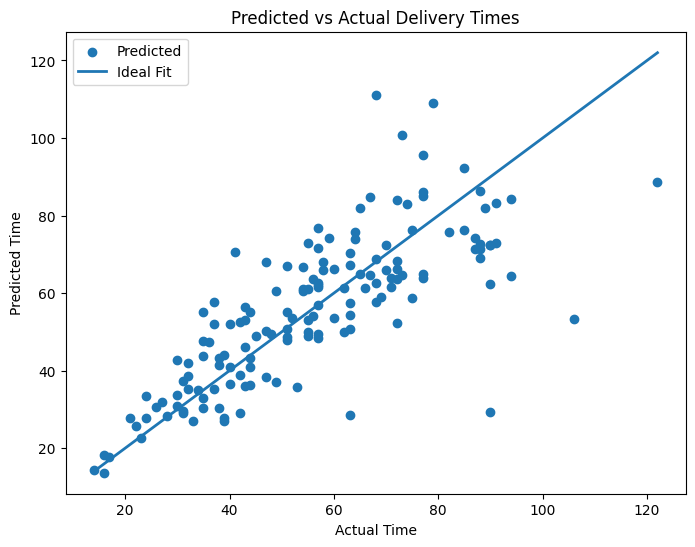

In [12]:
knn(3)

Train R^2: 0.8133479667944894
Test R^2: 0.6200222802954187
Mean square error: 164.11666666666667
Mean Absolute Error: 9.326666666666666
Root Mean Square Error: 12.810802733110313


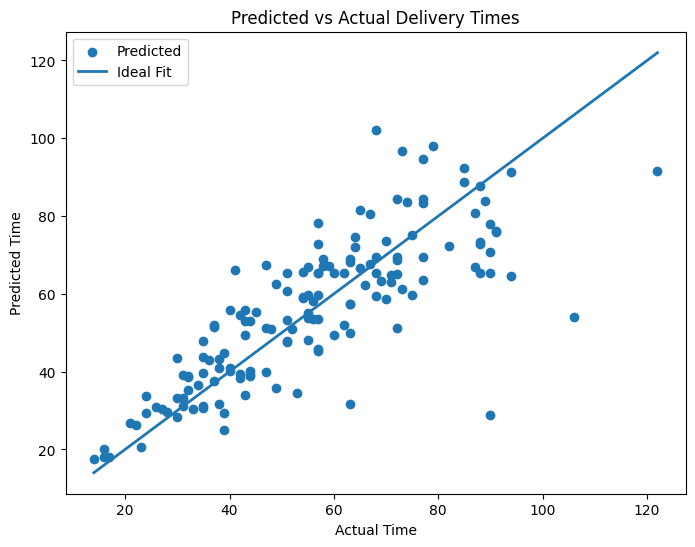

In [13]:
knn(4)

Train R^2: 0.7984522254349734
Test R^2: 0.6398890142461353
Mean square error: 155.53599999999997
Mean Absolute Error: 8.877333333333333
Root Mean Square Error: 12.47140729829637


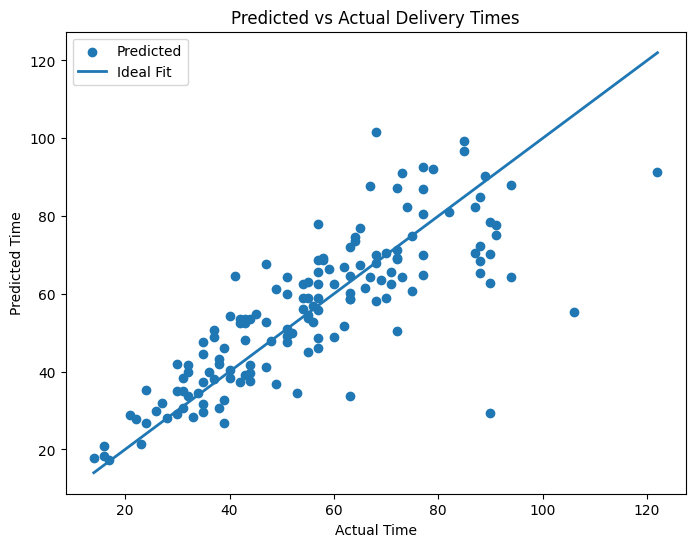

In [14]:
knn(5)

Train R^2: 0.7854150925763013
Test R^2: 0.6515681100769253
Mean square error: 150.49166666666667
Mean Absolute Error: 8.63888888888889
Root Mean Square Error: 12.267504500372791


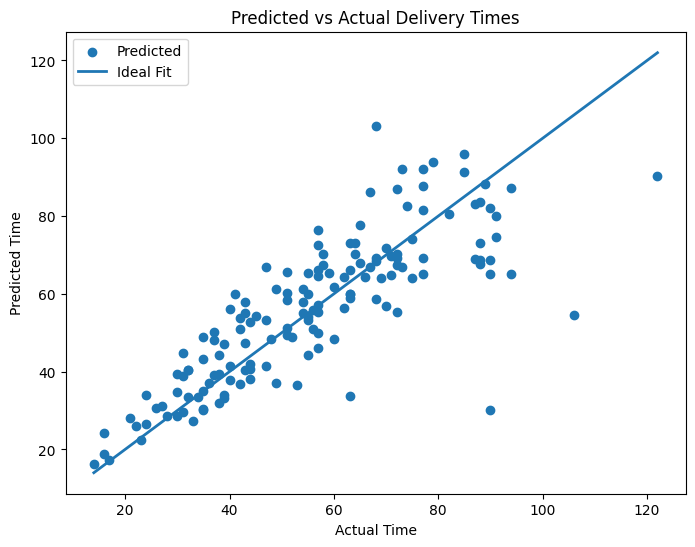

In [15]:
knn(6)

Train R^2: 0.7742589492370577
Test R^2: 0.6623840593989785
Mean square error: 145.82013605442177
Mean Absolute Error: 8.443809523809524
Root Mean Square Error: 12.075600856869267


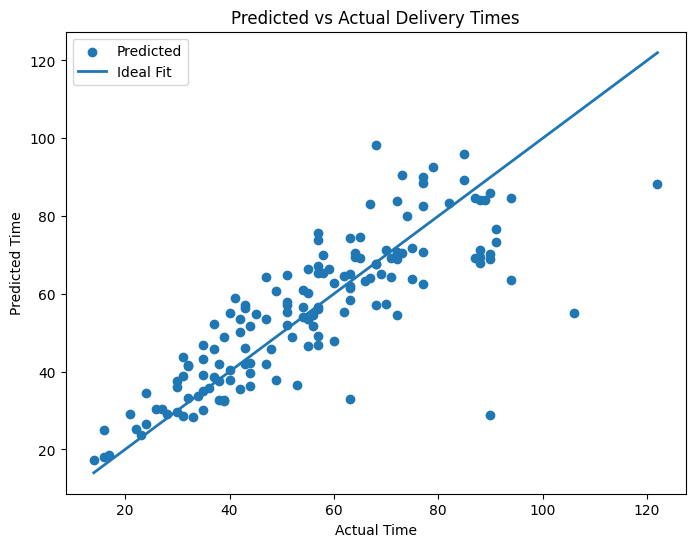

In [16]:
knn(7)

Train R^2: 0.7669920260680969
Test R^2: 0.6638466249087775
Mean square error: 145.1884375
Mean Absolute Error: 8.419166666666667
Root Mean Square Error: 12.04941647964747


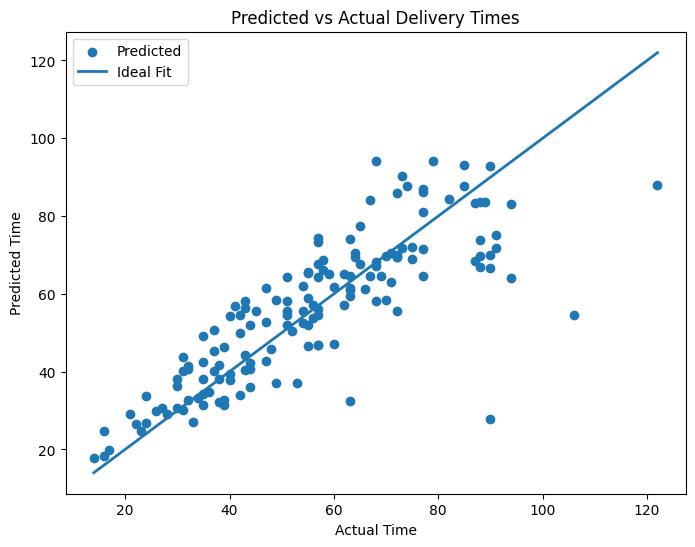

In [17]:
knn(8)

Train R^2: 0.7625119849436334
Test R^2: 0.6623944740245166
Mean square error: 145.8156378600823
Mean Absolute Error: 8.367407407407407
Root Mean Square Error: 12.075414604065664


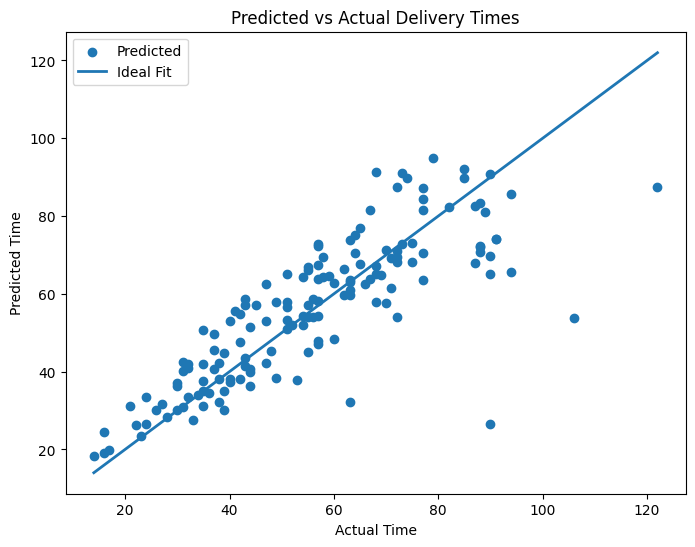

In [18]:
knn(9)

Train R^2: 0.7570069947301596
Test R^2: 0.6684035116676224
Mean square error: 143.22026666666667
Mean Absolute Error: 8.341333333333331
Root Mean Square Error: 11.967467011304718


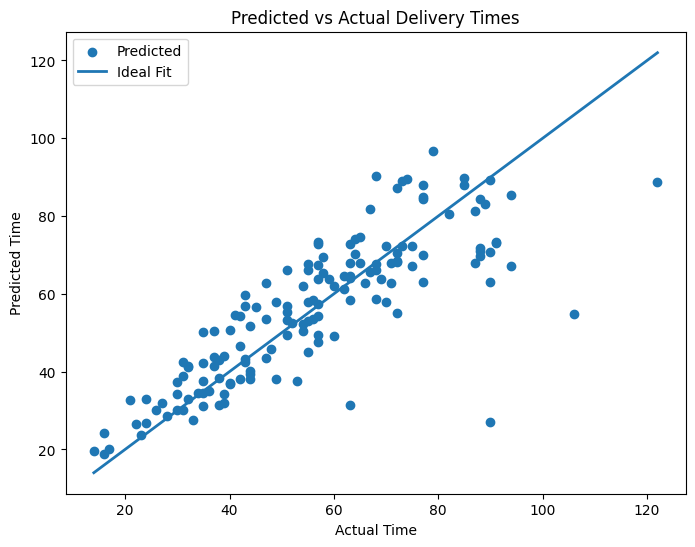

In [19]:
knn(10)